In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [28]:
data.shape

(1599, 12)

In [29]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- Set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [31]:
for x in data.quality.index:
    if data.quality[x]>=7:
        data.quality[x]=1
        
    else:
        data.quality[x]=0        

In [32]:
data.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

#### Checking for null values in dataset

In [33]:
data.isnull().values.any()

False

- There is no null values in the dataset

#### Checking for duplicated rows

In [34]:
data.duplicated().sum()

240

- There are 240 duplicated rows are present in this dataset

In [35]:
# finding duplicated rows
np.where(data.duplicated()) 

(array([   4,   11,   27,   40,   65,   76,   91,   93,  102,  105,  114,
         121,  132,  140,  141,  144,  153,  156,  157,  172,  176,  180,
         194,  206,  228,  233,  236,  238,  239,  244,  249,  254,  271,
         275,  276,  277,  283,  285,  290,  310,  319,  320,  325,  331,
         343,  366,  377,  382,  383,  391,  398,  400,  424,  425,  430,
         435,  438,  450,  458,  478,  486,  498,  499,  500,  502,  511,
         514,  526,  532,  535,  536,  555,  558,  564,  565,  567,  571,
         581,  592,  603,  616,  625,  627,  630,  642,  643,  644,  656,
         660,  669,  673,  676,  685,  697,  701,  716,  720,  728,  736,
         749,  751,  753,  758,  763,  770,  783,  786,  788,  799,  807,
         815,  823,  827,  831,  837,  846,  848,  851,  854,  856,  864,
         868,  877,  883,  884,  893,  897,  898,  902,  904,  914,  921,
         922,  923,  928,  933,  934,  936,  949,  950,  951,  964,  971,
         976,  983,  984,  990,  993, 

In [36]:
for ind in data.index:
    if ind==4:
        continue
    if data.iloc[ind].equals(data.iloc[4]):
        print(ind)

0


In [37]:
data.iloc[[0]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [38]:
data.iloc[[4]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


- Hence there are 240 duplicated rows are present we need to remove these rows

In [39]:
data.drop_duplicates(inplace=True)     # dropping duplicated rows

In [40]:
data.duplicated().sum()

0

In [41]:
data.shape

(1359, 12)

#### EDA

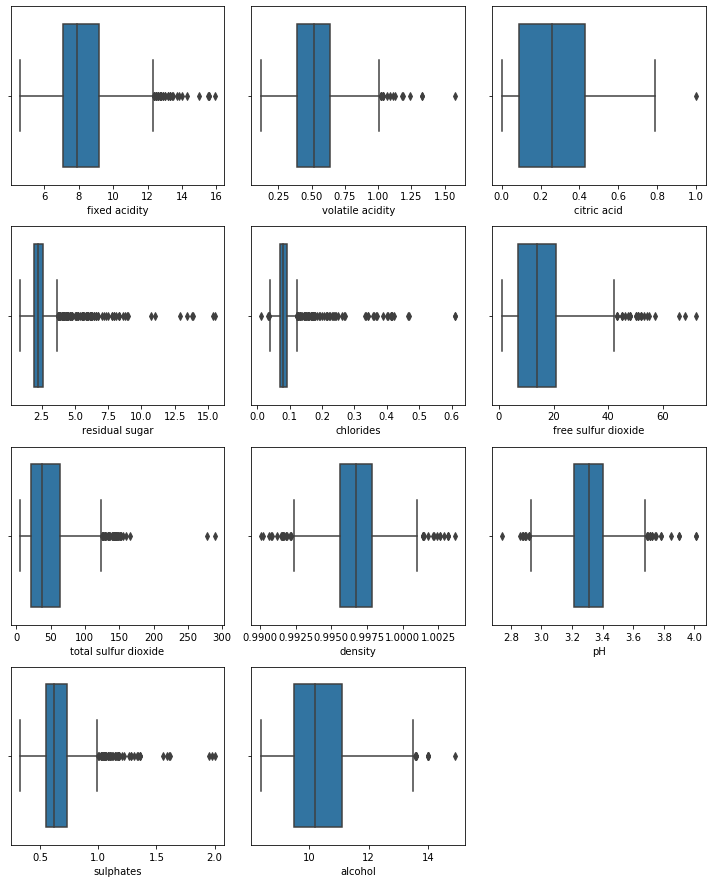

In [42]:
plt.figure(figsize=(10,15))

for x,col in zip(range(len(data.columns[:-1])),data.columns[:-1]):
    
    plt.subplot(5,3,x+1)
    sns.boxplot(data[col])
    plt.tight_layout()

- Some outliers are present in dataset

#### Handling outliers

In [43]:
from scipy.stats import zscore

zscr=np.abs(zscore(data))

print(np.where(data[zscr>3]))
print(len(data[zscr>3]))

(array([  0,   0,   0, ..., 152, 152, 152], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
153


In [69]:
new_df=data[(zscr<3).all(axis=1)]

In [70]:
new_df.shape

(1239, 12)

#### Checking skewness of dataset

In [71]:
new_df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

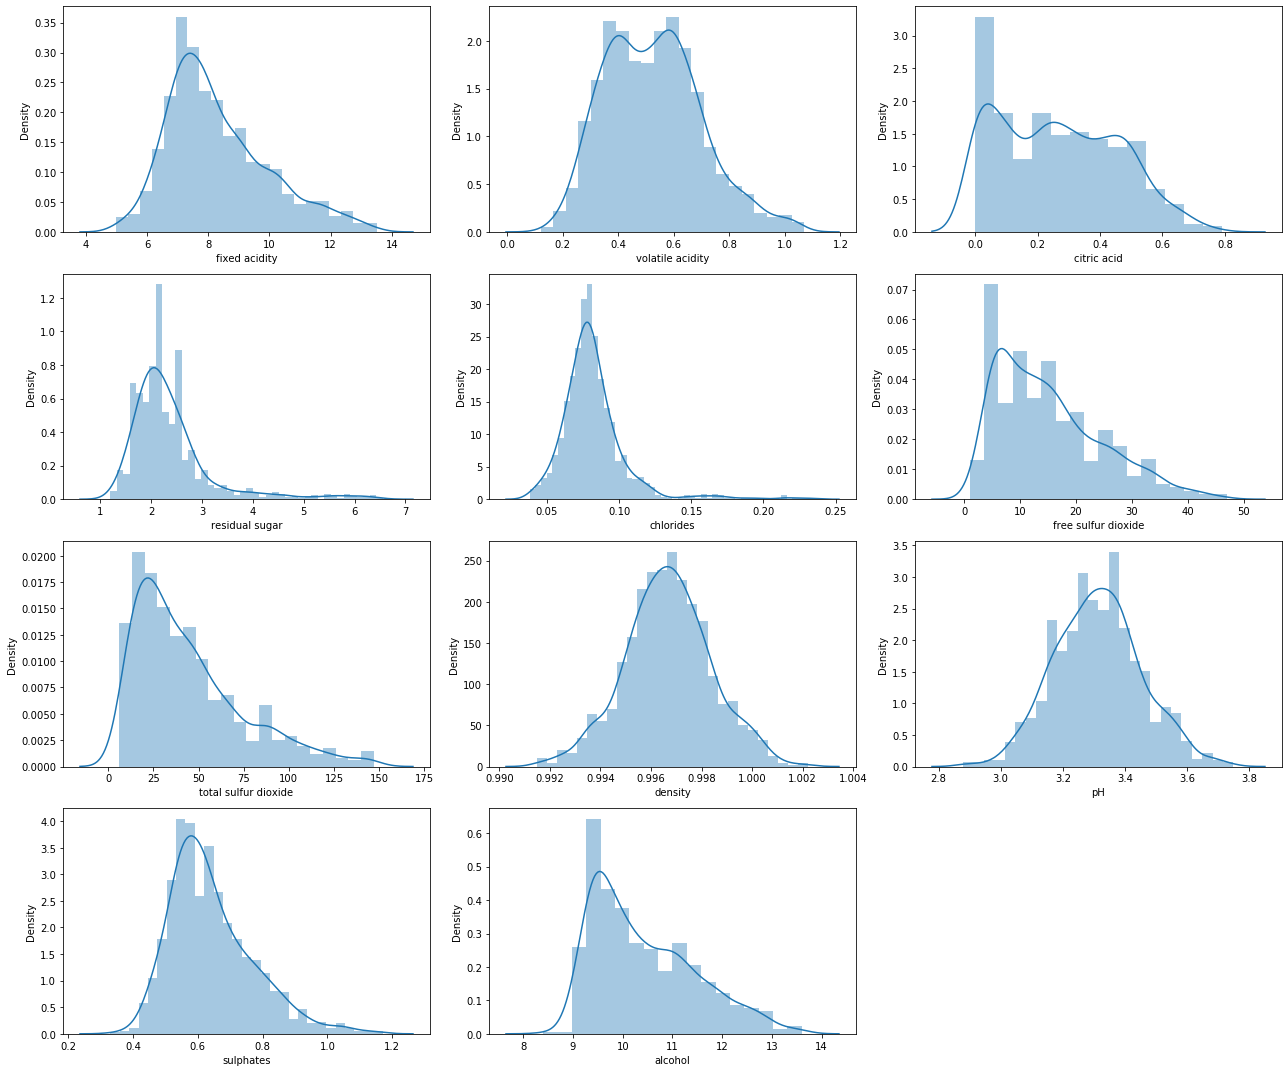

In [72]:
plt.figure(figsize=(18,15))

for x,col in zip( range(len(new_df.columns[:-1])) , new_df.columns[:-1] ):
    
    plt.subplot(4,3,x+1)
    sns.distplot(new_df[col])
    plt.tight_layout()

In [73]:
Data=new_df

In [63]:
Data.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          2.371572
chlorides               2.480193
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 2.121367
dtype: float64

#### Handling Skewness

In [75]:
for index in Data.skew().index:
    if Data.skew().loc[index]>0.5:
        Data[index]=np.cbrt(Data[index])
    if Data.skew().loc[index]<-0.5:
        Data[index]=np.cbrt(Data[index])

#### Handling unbalanced data using upsampling

In [91]:
Data.quality=Data.quality.astype('int')

In [92]:
Data.quality.value_counts()

0    1070
1     169
Name: quality, dtype: int64

In [93]:
from sklearn.utils import resample

In [95]:
good_quality=Data[Data.quality==1]
bad_quality=Data[Data.quality==0]

In [96]:
upsmp_good=resample(good_quality,n_samples=len(bad_quality))

In [97]:
upsampled_df=pd.concat([upsmp_good,bad_quality])

In [98]:
upsampled_df.quality.value_counts()

1    1070
0    1070
Name: quality, dtype: int64

#### Splittind dataset into input and output

In [101]:
xdata=upsampled_df.drop(columns=['quality'])
xdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1323,2.087759,0.36,0.39,1.216440,0.391487,2.758924,3.802952,0.99495,3.18,0.935990,2.223980
1133,1.930979,0.48,0.07,1.765174,0.446475,2.154435,2.620741,0.99684,3.37,0.879366,2.237378
16,2.040828,0.28,0.56,1.216440,0.451436,3.271066,4.687548,0.99690,3.30,0.908560,2.189760
1323,2.087759,0.36,0.39,1.216440,0.391487,2.758924,3.802952,0.99495,3.18,0.935990,2.223980
873,2.087759,0.21,0.37,1.169607,0.406155,1.817121,2.154435,0.99552,3.23,0.833955,2.230699


In [102]:
ydata=upsampled_df.quality

#### Finding best random_state value

In [103]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [114]:
maxacc=0
maxrs=0

for rs in range(1,101):
    xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=rs,stratify=ydata)
    rmodel=RandomForestClassifier()
    rmodel.fit(xtrain,ytrain)
    pred=rmodel.predict(xtest)
    acc=accuracy_score(ytest,pred)
    
    if acc>maxacc:
        maxacc=acc
        maxrs=rs
        
print(f'Best accuracy {maxacc} at random_state {rs}')

Best accuracy 0.9735202492211839 at random_state 100


In [119]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=42,stratify=ydata)

In [120]:
rmodel=RandomForestClassifier()
rmodel.fit(xtrain,ytrain)
ypred=rmodel.predict(xtest)
accuracy_score(ytest,ypred)

0.9501557632398754

In [122]:
# importing all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#importing boosting models

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

# importing error metrics

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [123]:
models=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]
ypreds=[]
for model in models:
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    ypreds.append(pred)
    print(f"Metrics evaluation of model {model} :")
    print(f'Accuracy score :\n {accuracy_score(ytest,pred)}\n')
    print(f'Confusion matrix :\n {confusion_matrix(ytest,pred)}\n')
    print(f'Classification report :\n{classification_report(ytest,pred)}\n')
    print('_________________________________________________________\n')

Metrics evaluation of model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
Accuracy score :
 0.7834890965732088

Confusion matrix :
 [[239  82]
 [ 57 264]]

Classification report :
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       321
           1       0.76      0.82      0.79       321

    accuracy                           0.78       642
   macro avg       0.79      0.78      0.78       642
weighted avg       0.79      0.78      0.78       642


_________________________________________________________

Metrics evaluation of model GaussianNB(priors=None, var_smoothing=1e-09) :
Accuracy score :
 0.7928348909657321

Confusion matrix :
 [[240  81]
 [ 52 2

#### Cross_val_score on different models

In [124]:
models=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for model in models:
    score=cross_val_score(model,xdata,ydata,cv=5,scoring='accuracy')
    print(f'Model : {model}')
    print(f'Score : {score}')
    print(f'Mean score : {score.mean()}')
    print(f'Standard deivation : {score.std()}\n')
    print('_________________________________________________________\n')

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score : [0.87149533 0.74766355 0.8317757  0.69392523 0.80607477]
Mean score : 0.7901869158878505
Standard deivation : 0.0627178707608797

_________________________________________________________

Model : GaussianNB(priors=None, var_smoothing=1e-09)
Score : [0.85981308 0.67990654 0.86214953 0.72196262 0.8271028 ]
Mean score : 0.7901869158878505
Standard deivation : 0.07510728344543248

_________________________________________________________

Model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_im

- ExtraTreesClassifier has low difference b/w cross_val_score and accuracy_score with highest accuracy

#### Best parameters for ExtraTreesClassifier

In [125]:
grd=GridSearchCV(ExtraTreesClassifier(),
                 {'criterion':['gini','entropy'],'n_estimators':range(80,100)})

grd.fit(xtest,ytest)
grd.best_params_

{'criterion': 'entropy', 'n_estimators': 82}

In [126]:
xmodel=ExtraTreesClassifier(criterion='entropy',n_estimators=82)

In [128]:
xmodel.fit(xtrain,ytrain)
ypred=xmodel.predict(xtest)
accuracy_score(ytest,ypred)*100

97.81931464174455